In [12]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/'
anndata_objects = []
name_anndata = "A1-1"+"/"+"anndataNucA11"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
name_anndata = "A1-2"+"/"+"anndataNucA12"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
name_anndata = "C2"+"/"+"anndataNucC2"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
name_anndata = "D2-1"+"/"+"anndataNucD21"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
name_anndata = "PS"+"/"+"ps_slice"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
samples = ["A1-1", "A1-2", "C2", "D2-1", "PS"]

In [3]:
anndata_samples_together = anndata_objects[0].concatenate(anndata_objects[1],anndata_objects[2],anndata_objects[3],anndata_objects[4])

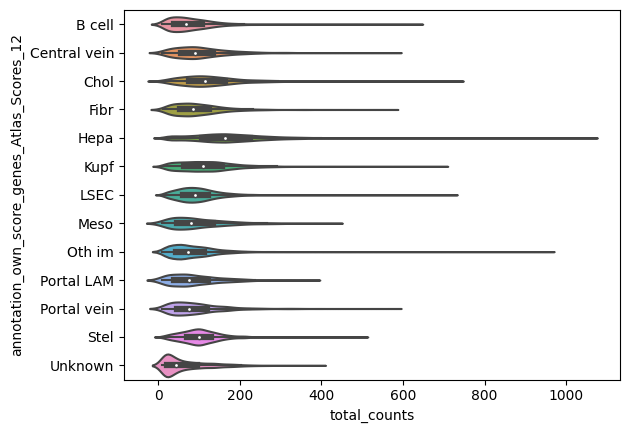

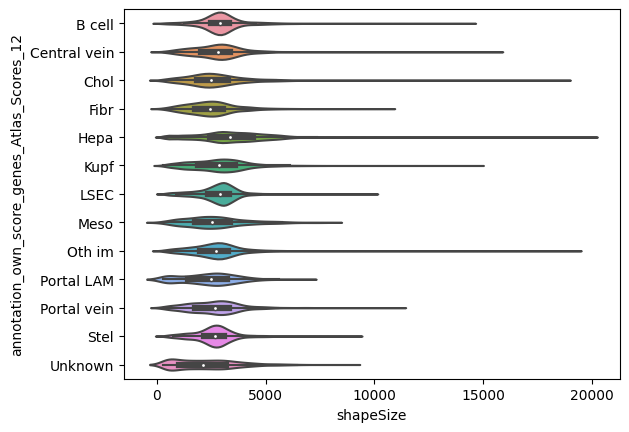

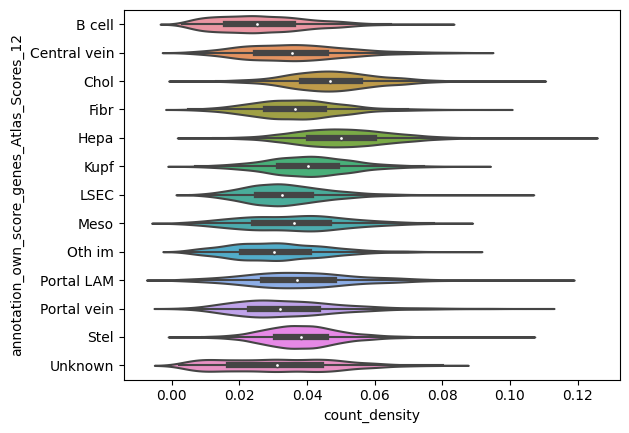

In [4]:
anndata = anndata_samples_together
annotation = 'annotation_own_score_genes_Atlas_Scores_12'
sns.violinplot(data=anndata.obs,x="total_counts",y=annotation)
plt.show()
sns.violinplot(data=anndata.obs,x="shapeSize",y=annotation)
plt.show()
anndata.obs['count_density'] = anndata.obs['total_counts'] / anndata.obs['shapeSize']
sns.violinplot(data=anndata.obs,x="count_density",y=annotation)
plt.show()

In [40]:
annotation = 'annotation_own_score_genes_BasicMartin_12'
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/BasicMartin.csv"
name = 'BasicMartin'
# drop first 11 characters
annotation_scores = annotation[11:]

Text(0.5, 1.0, 'Score correlation matrix BasicMartin')

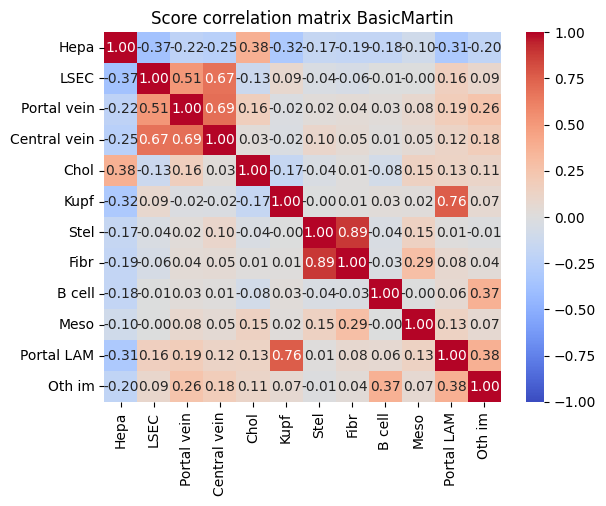

In [41]:
corr_matrices = []
for anndata in anndata_objects:
    scores = anndata.uns[annotation_scores]
    corr_matrix = scores.corr(method='pearson')
    corr_matrices.append(corr_matrix)   
# average df in corr_matrices
average_corr_matrix = sum(corr_matrices)/len(corr_matrices)
average_corr_matrix
# make heatmap
sns.heatmap(average_corr_matrix, annot=True,fmt='.2f',vmin=-1, vmax=1, cmap='coolwarm')
# add title
plt.title('Score correlation matrix '+name)

Hepa            10
LSEC            11
Portal vein      5
Central vein     7
Chol             7
Kupf            16
Stel            16
Fibr            16
B cell           4
Meso             5
Portal LAM      12
Oth im           6
dtype: int64


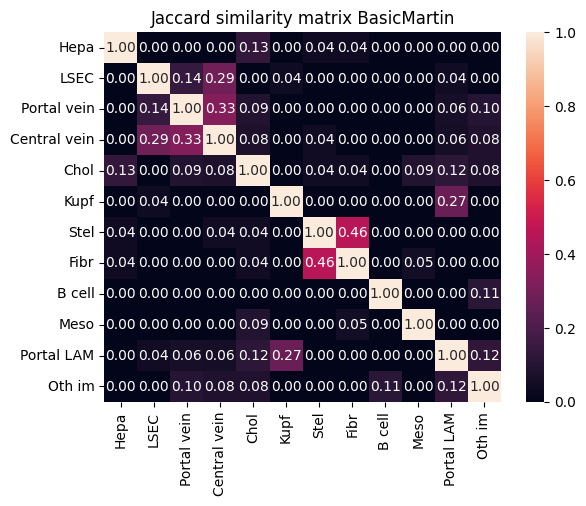

In [30]:
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/BasicMartin.csv"
name = 'BasicMartin'
Jacc_m = Jaccard_similarity_matrix(path_mg,name)

Text(0.5, 1.0, 'Score correlation - Jaccard matrix BasicMartin')

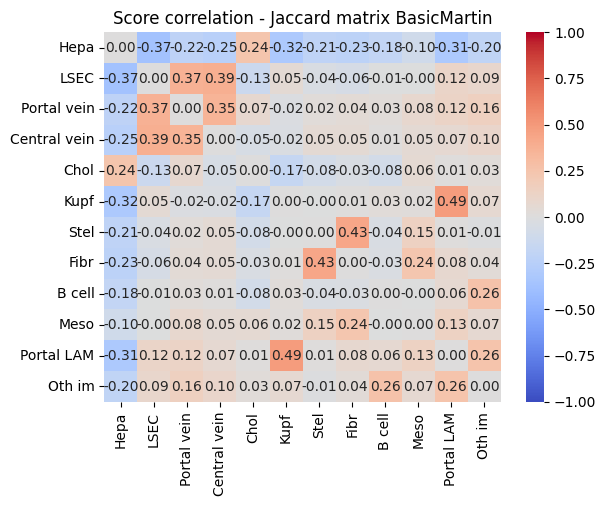

In [42]:
# subtract matrices
diff_matrix = average_corr_matrix - Jacc_m
sns.heatmap(diff_matrix, annot=True,fmt='.2f',vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Score correlation - Jaccard matrix '+name)

Meso
[]
Fibr
[(31, 0.81, 118, 'Fibr', 0.0)]
Hepa
[(2, 0.98, 164, 'Hepa', 0.0)]
Kupf
[(6, 1.0, 146, 'Kupf', 0.0)]
LSEC
[(0, 0.99, 172, 'LSEC', 0.0)]
B cell
[(82, 1.0, 76, 'B cell', 0.0)]
Central vein
[(92, 0.98, 66, 'Central vein', 0.0)]
Stel
[(8, 1.0, 141, 'Stel', 0.0)]
Portal vein
[(10, 0.99, 137, 'Portal vein', 0.0)]
Unknown
[(36, 0.33, 115, 'Portal vein', 0.03), (59, 0.35, 93, 'Kupf', 0.01), (100, 0.47, 59, 'Oth im', 0.02), (111, 0.5, 38, 'LSEC', 0.0)]
Chol
[(25, 0.98, 123, 'Chol', 0.0)]
Portal LAM
[]
Oth im
[(1, 0.74, 171, 'Oth im', 0.0)]


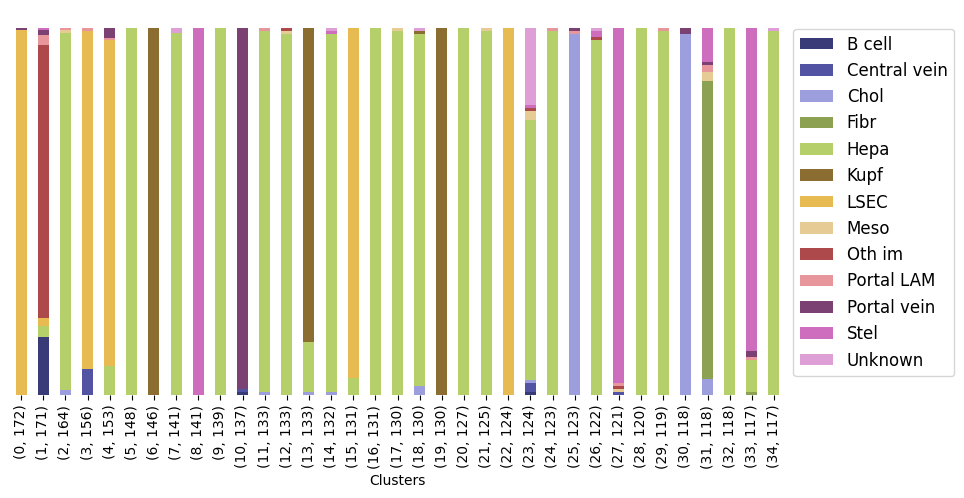

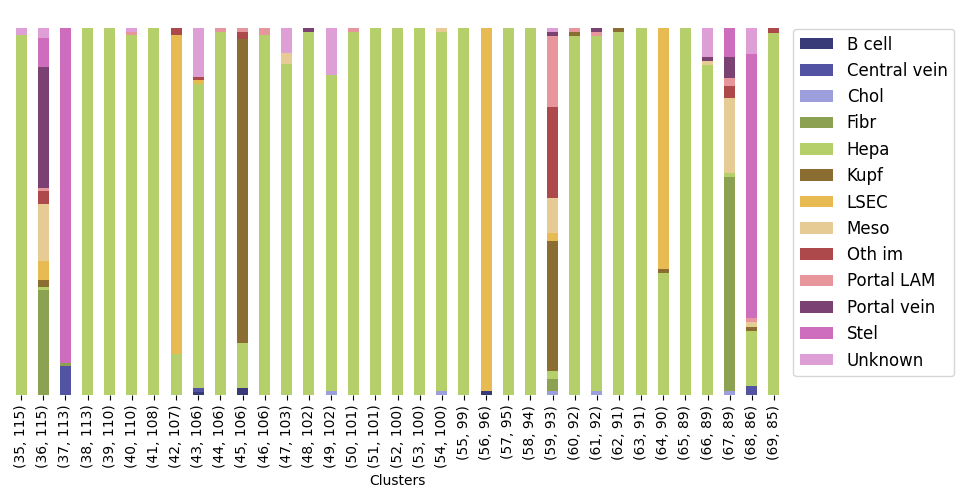

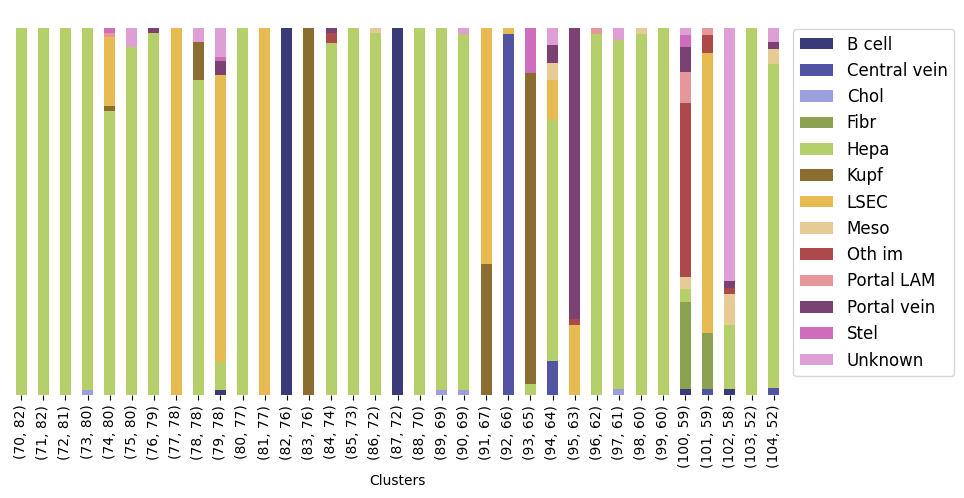

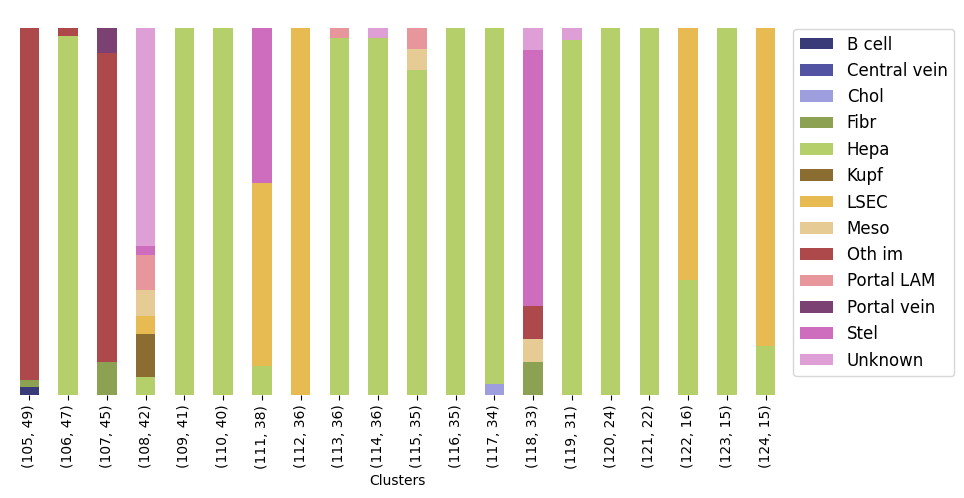

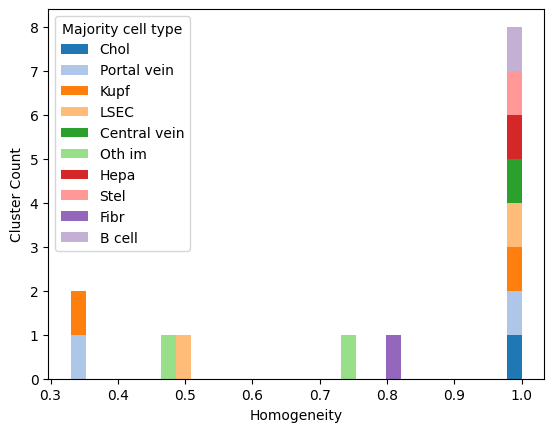

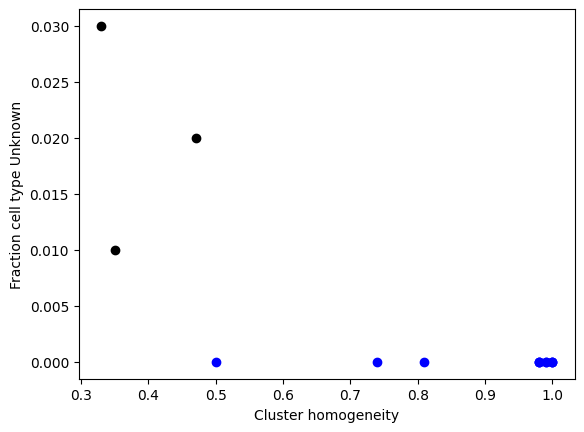

In [13]:
miniLeiden = clusteringVSleiden(anndata,'annotation_own_score_genes_Atlas_Scores_12','leiden')